# Eutrophication Risk

Bar graph depicting the proportion of basins by Index of Coastal Eutrophication Potential by country or territory <br>

Note that this is a parameterized widget; the specification passed to the API will not be renderable without the geostore identifier being inserted. 

*Author: Rachel Thoms
<br>Created: 27 Aug 2021
<br>Environment: jupyterlab*

## Style

- Vega chart
- Chart type: bar graph
- Value: Proportion of basins 

## Data

- Processed data: [ocn_calcs_014_eutrophication_risk](https://resourcewatch.carto.com/u/wri-rw/dataset/ocn_calcs_014_eutrophication_risk)
- Underlying dataset: 
    - [wat_059_aqueduct_coastal_eutrophication_potential](https://resourcewatch.carto.com/u/wri-rw/dataset/wat_059_aqueduct_coastal_eutrophication_potential)
    - Resource Watch [Explore Page](https://resourcewatch.org/data/explore/wat059-Aqueduct-Coastal-Eutrophication-Potential)
- Source: [Aqueduct](https://files.wri.org/d8/s3fs-public/aqueduct-30-updated-decision-relevant-global-water-risk-indicators_1.pdf)

## Preparation

Data was processed using a [python script](https://github.com/resource-watch/ocean-watch-data/blob/main/widgets/ocn_calcs_014_eutrophication_risk/ocn_calcs_014_eutrophication_risk_processing.py)

In [2]:
import json
from vega import Vega
from IPython.display import display

In [3]:
def Vega(spec):
    bundle = {}
    bundle['application/vnd.vega.v5+json'] = spec
    display(bundle, raw=True)

## Data Exploration

### Queries

#### Pivot version for data inspection

```"data" : "table"```
```sql
SELECT gadm.gid_0, gadm.name_0, cep_label, count, proportion FROM ocn_calcs_014_eutrophication_risk AS data LEFT OUTER JOIN gadm36_0 gadm ON data.gid_0 = gadm.gid_0 WHERE gadm.geostore_prod ILIKE '4c97375ec074beb743fd972130cb1d3b' UNION SELECT gid_0, name_0, cep_label, count, proportion FROM ocn_calcs_014_eutrophication_risk WHERE gid_0= 'GLB'
```
```"data" : "country"```
```sql
SELECT gadm.gid_0, gadm.name_0, cep_label, count, proportion FROM ocn_calcs_014_eutrophication_risk AS data LEFT OUTER JOIN gadm36_0 gadm ON data.gid_0 = gadm.gid_0 WHERE gadm.geostore_prod ILIKE '4c97375ec074beb743fd972130cb1d3b'
```

#### Parameterized

```"data" : "table"```
```sql
SELECT gadm.gid_0, gadm.name_0, cep_label, count, proportion FROM ocn_calcs_014_eutrophication_risk AS data LEFT OUTER JOIN gadm36_0 gadm ON data.gid_0 = gadm.gid_0 WHERE gadm.{{geostore_env}} ILIKE '{{geostore_id}}' UNION SELECT gid_0, name_0, cep_label, count, proportion FROM ocn_calcs_014_eutrophication_risk WHERE gid_0= 'GLB'
```
```"data" : "country"```
```sql
SELECT gadm.gid_0, gadm.name_0, cep_label, count, proportion FROM ocn_calcs_014_eutrophication_risk AS data LEFT OUTER JOIN gadm36_0 gadm ON data.gid_0 = gadm.gid_0 WHERE gadm.{{geostore_env}} ILIKE '{{geostore_id}}'
```

## Resource Watch Vega Config

In [23]:
spec=json.loads("""{
  "$schema": "https://vega.github.io/schema/vega/v5.json",
  "padding": 5,

  "data": [
    {
      "name": "table",
      "url": "https://wri-rw.carto.com/api/v2/sql?q= SELECT gadm.gid_0, gadm.name_0, cep_label, count, proportion, 'country' AS tag FROM ocn_calcs_014_eutrophication_risk AS data LEFT OUTER JOIN gadm36_0 gadm ON data.gid_0 = gadm.gid_0 WHERE gadm.{{geostore_env}} ILIKE '{{geostore_id}}' UNION SELECT gid_0, name_0, cep_label, count, proportion, null as tag FROM ocn_calcs_014_eutrophication_risk WHERE gid_0= 'GLB'",
      "format": {"type": "json", "property": "rows"},
      "transform": [
        {
          "type": "formula",
          "expr": "datum.cep_label === 'No Data' ? 'N/A' : split((split(datum.cep_label, '(')[1]),')')[0]",
          "as": "range"
          },
        {
          "type": "formula",
          "expr": "split(datum.cep_label, '(')[0]",
          "as": "label"
          },
        {
          "type": "formula",
          "expr": "datum.range === '<-5' ? 1 : datum.range === '-5 to 0' ? 2:  datum.range === '0 to 1' ? 3: datum.range === '1 to 5' ? 4:  datum.range === '>5' ? 5: 6 ",
        "as": "order"},
        {
          "type": "formula",
          "expr": "datum.order == 2 ? 'Low to Med': datum.order == 3 ? 'Med to High' : datum.order == 5 ? 'Very High' : datum.label ",
          "as": "label" 
          },
        {
          "type": "collect", 
          "sort": {"field": ["order","tag"],"order": ["ascending"]}
          }
        ]
      },
    {
      "name": "world",
      "source": "table",
      "transform": [
        {
          "type": "filter",
          "expr": "datum.gid_0 == 'GLB'"
          }
        ]
      },
  {
    "name": "country",
    "source": "table",
    "transform": [
      {
        "type": "filter",
        "expr": "isValid(datum.tag)"
        }
      ]
    }
  ],
  "signals": [
    {
      "name": "tooltip",
      "value": {},
      "on": [
        {"events": "rect:mouseover", "update": "datum"},
        {"events": "rect:mouseout",  "update": "{}"}
      ]
    },
    {
      "name": "tag",
      "update": "data('country')[0]['gid_0']"
    }
  ],
  "scales": [
    {
      "name": "xscale",
      "type": "band",
      "domain": {"data": "table", "field": "label"},
      "range": "width",
      "padding": 0.1,
      "round": true
    },
    {
      "name": "yscale",
      "domain": {"data": "table", "field": "proportion"},
      "nice": true,
      "range": "height"
    },
    {
      "name": "color",
      "type": "ordinal",
      "domain": {"data": "world", "field": "label"},
      "range": ["#ffed73", "#ffce54", "#ffab14", "#DD4A39", "#b21c2b", "#4e4e4e"]
    },
    {
      "name": "line",
      "type": "ordinal",
      "domain": [
        "Global avg."
      ]
    }
  ],
  "axes": [
    { 
      "orient": "bottom", 
      "scale": "xscale",
      "titleFontStyle": "normal",
      "titleFontWeight": 600,
      "titlePadding": 5,
      "labelFontSize": 11,
      "labelOverlap": true,
      "labelBaseline": "middle",
      "zindex": 4
      },
    { 
      "orient": "left", 
      "scale": "yscale",
      "titleFontStyle": "normal",
      "titleFontWeight": 600,
      "titlePadding": 5,
      "labelBaseline": "middle",
      "labelAlign": "right",
      "labelPadding": 5,
      "format": "%",
      "grid": true,
      "gridOpacity": 0.1,
      "zindex": 0
      }
  ],
  "marks": [ 
    {
      "type": "text",
      "zindex": 3,
      "encode": {
        "enter": {
          "align": {"value": "center"},
          "baseline": {"value": "bottom"},
          "fill": {"value": "#333"}
        },
        "update": {
          "x": {
            "scale": "xscale", 
            "signal": "tooltip.label", 
            "band": 0.5
            },
          "y": {
            "scale": "yscale", 
            "signal": "tooltip.proportion", 
            "offset": -2
            },
          "text": {
            "signal": "isNumber(tooltip.proportion) ? format(tooltip.proportion, '.2f'): ' ' "
            },
          "fillOpacity": [
            {"test": "datum === tooltip", "value": 0},
            {"value": 1}
          ]
        }
      }
    },
    {
      "name": "outline-grey",
      "type": "rect",
      "zindex": 2,
      "from": {"data":"world"},
      "encode": {
        "enter": {
          "x": {"scale": "xscale", "field": "label"},
          "width": {"scale": "xscale", "band": 1},
          "y": {"scale": "yscale", "field": "proportion"},
          "height": {"value": 0},
          "stroke": [
            {
              "test": "tag == 'GLB'", 
              "value": "transparent"
              }, 
            {"value": "grey"}
            ],
          "strokeDash":{"value": [4,4]},
          "strokeWidth": {"value": 3},
          "tooltip": {
            "signal": "{'Country': datum.name_0, 'Risk level': datum.label, 'ICEP Range' : datum.range, 'Number of basins': datum.count}"
          }
        },
        "update": {
          "strokeOpacity": {"value": 1}
        },
        "hover": {
          "strokeOpacity": {"value": 0.5}
       }
      }
    },
     {
      "name": "outline-white",
      "type": "rect",
      "zindex":2,
      "from": {"data":"world"},
      "encode": {
        "enter": {
          "x": {"scale": "xscale", "field": "label"},
          "width": {"scale": "xscale", "band": 1},
          "y": {"scale": "yscale", "field": "proportion"},
          "height": {"value": 0},
          "stroke": [
            {
              "test": "tag == 'GLB'", 
              "value": "transparent"
              }, 
            {"value": "white"}
            ],
          "strokeDash":{"value": [4,4]},
          "strokeWidth": {"value": 2}
        },
        "update": {
          "strokeOpacity": {"value": 1}
        },
        "hover": {
          "strokeOpacity": {"value": 0.5}
       }
      }
    },
    {
      "name": "bars",
      "type": "rect",
      "from": {"data":"country"},
      "zindex":1,
      "encode": {
        "enter": {
          "x": {"scale": "xscale", "field": "label"},
          "width": {"scale": "xscale", "band": 1},
          "y": {"scale": "yscale", "field": "proportion"},
          "y2": {"scale": "yscale", "value": 0},
          "fill": {"scale": "color", "field": "label"}
        },
        "update": {
          "fillOpacity": {"value": 1}
        },
        "hover": {
          "fillOpacity": {"value": 0.5}
       }
      }
    }
  ],
  "legends": [
    {
      "fill": "line",
      "zindex": 4,
      "orient": "top-right",
      "labelFont": "Lato",
      "encode": {
        "symbols": {
          "update": {
            "size": {"value": 80},
            "stroke": {"value": "lightgrey"},
            "strokeDash":{"value": [4,2]},
            "shape": {
              "value": "stroke"
            }
          }
        }
      }
    }
  ],
    "interaction_config": [
    {
      "name": "tooltip",
      "config": {
        "fields": [
          {
            "column": "name_0",
            "property": "Country",
            "type": "string",
            "format": ""
          },
          {
            "column": "label",
            "property": "Risk Level",
            "type": "string",
            "format": ""
          },
          {
            "column": "count",
            "property": "Number of Basins",
            "type": "number",
            "format": ""
          }
        ]
      }
    }
  ]
}
""")

Adjust the spec for visualization with in the notebook

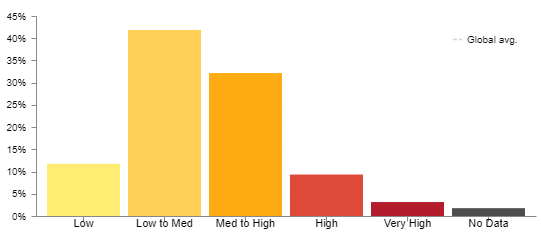

In [24]:
vega_view=dict(spec)
vega_view['height'] = 200
vega_view['width'] = 500
vega_view['legends'][0]['labelFont'] = 'Arial'
vega_view['data'][0]['url']= vega_view['data'][0]['url'].replace('{{geostore_env}}','geostore_prod').replace('{{geostore_id}}','fe855e0073d3a7c45ccd5f653841bb8d')
vega_view['marks'][1]['encode']['enter']['tooltip']['signal'] = "{'Country': datum.name_0, 'Risk level': datum.label, 'ICEP Range' : datum.range, 'Number of basins': datum.count}"
Vega(vega_view)

[Open the Chart in the Vega Editor](https://vega.github.io/editor/#/url/vega/N4IgJAzgxgFgpgWwIYgFwhgF0wBwqgegIDc4BzJAOjIEtMYBXAI0poHsDp5kTykSArJQBWENgDsQAGhAB3GgBN6aABwAGNTPg0yWNABYNMnEgUKa4smgEyFSTClQBtUOKQI4aEA6YAbTzIMAE6+Xli4+ESyQTQAtEGylFBIQZhsSWwIBEg4NCQATJwAjr4A-EUAvAAEAMoAogAydQDCACpVFAoI1IoA+podpt1uHv1SVVBwOL2+SExwvuNQbAzimOM4QWw4bKns4uMA5MurmEEAnodVAII1VQ5kVQBiAEoA8gCyVWxQ4r3JvigEH6AEZ9L04AwztsYDRkph9r0YhAANY3O52BxVJpPdpvACqrTqLyqACk3gBJABygy6AGYAGz9WkIKpvGmYqi0BTM6qdbrc5n4qkU9m1RotdqCgYjOBjCZTGZzBZLFZrDZbHZ7CTjcQMXy+KpICD3JCPV6fb6-f5IQHAtRgiFQzWw+GI5FogDqAAliXUOn01NVDgBxBoAIUO0hAADNdshMGhQJhzjhPOhRBJo5ttnBUucvFtZBAQABfGRnJDiCBxoIINAubyp9Oxmi+TB56NwAAemy8AApMQwBYGqhVqic1hcqgAfGdVIcjnlqMfBsORgCUZakyebXlrCH1KBkPb76AgOF8dH7-YvV8wg-sw6Sitm80WVUO-cOG6cIIAuhuUg-j+ThqP+0bGoWVZkJ45a7mm+7xkeXa9kEXh3tei4vtMb4qp+36-uBkElugeGhPBTaIegB4oSeaFeNhQQwXAq7BgAPLEAhXKUVQglUqALk+3TMZYrHjsGXH3GwVRqDxVT5IJQmYM+omwWxn4rmkfHyXSglMSxGmHPx2ncVUvH6EpBliUZAB8Zm8QIgkMlUJFeLsCidpRKbUbGyGzKhZ4gNhHl5quCnmZ+DRsLI0lVB8cAKIc+nCZQoVBOFdKRYcCUKHF3o6DAVwpSp3TpeFAjZQAanm5xVAVujFcpz7ka5MhQWRyoUTuVEtssBpwFAiYyGIqRJq2CwKA2IDpdGDwgP+Mizc4IDGpM4jmJYC2lqW-6UbKXiyLsvhTSNKxBJMXg+P4c2iTW8YNghLYxm2HbofRQXYQ84V6gaZZ7T1B3oJOZwFmdwSXeg10BN4d0Ho9vX7q9nYfeh6CPqVPTLuFIMXFu3l7jRyPvSAp5oyANAQFVtqKBjz4PPje2LSAEA6G4vikY2QPeGwbDtjQODRsQtoMOmwDljNkjOKAcCkGspEgEEg2YKgCArBAcBsKQJMMDgmItou24y3LmAK0rQ2q+rmtQtGuv6144v-ft7gtvNgR6-YBv2Eg3645cRH-k4hzSocEHOx4Xh+0LIstuu0ZMBYU2oKAFg4Db54LMr0bbAiEicyAccyOGLzXNGFIACJUtGzRvA00Z1K03rRh8dQABpl1S5f1zUrTV96VcyCGxfRlSDRdzIrT4i80b4jUpd7btI0AnAnOuC7XjdtAtowz5LZMFWp3BZkSAWONnJXXMN0yC9k1eOR26Kyxh2KMoximJtVioGolAgjIWyrEnM4otw4tnOFvK+R9kCn2TsFb2F8-AwxvidLwOYtS50kBLcQcJ0xALgH-J+6BtC6ETCAyOfNdhzUJjNIIm1bTRgUMfaBoBz7oCOiEQ+SCk4gHvhLNS6YnAgAAMQxhjIlAA7HSaMwiYyTAEPoKRIi5hgikeXcu+hrh0gAJxSKYPkEEUB8hMCkfoOAJiTHbUBuvMiFgd5UI8hYOhthGFSwESGXwbB96GiQMQMglBtrMyQN2FeCNdg0DgGsLwTA2DYEyNGcBLZN7LzmnQfwTwJCJnQNcGIjjvApLgGktYNQUw3XQOIeMOSESYFSekz0cBCoZIZEYXJVS4AAAV34WE-jYbhXUCkZJAFkmgOTyJ9JqDQAAXumEEv8envjeNrWYgtUC4JkORcMxoFg2K8AgRQCgIHjMTj2AwlFQnhP6f4GMw0WZJPQGApJFY8l9K8IMipjz0lFPOCUkAZS6yvJaX02p9S0CNM0M0-w7SzCdOsKs3p6TnnZNCDC986yNZXnEC2HZZgIHkWuFeMgUtFZAqRQsCFH9oV+V+f0gApNGMgMRAFBFFjIOlig3gmCgHQAsX8f4yAORtI5X9F4gGQEEFEq9EZQx7FcvlnluxoDpCecQyxPLjTOZ2GBNN8XjWFr4UWkc1XoQlvvVFWyYE6r1egKJMT6wSxen9M1McvCCLpC6ssEs7ae3GnKmB8SN6+pGmzOhUNeb8xwJQe+Mh94bTQN-AQEsuWgF9bc-1LNA2hGDXzBEYbUG7HQdnERGsMmxHyBLDs3YMmJrTV4SmVJhzzCCP2NImaBaUBzdqcQG5IoHnsI2kNWbW2alzfsI4lB8gxh-IJK4VwH52t8GypAHKUwIw7BAfpi4NJNtDdHXV6Y1CUXNVM3aO1SHoBWFUmxsQ6VwDBhKxWWdeWHO9fka+Wx6wwJYXIY6U0JbhOVWLUmax1WgG9Ymm5IBEnb2jJwu+XUH7yCUDAcaSbwMpqjUnEE8akNgbuZB6+YTkHoDbXmiWRC9AOp3TGiWq6tgon4cmFe-S-bhVDBGKMMgD1XTuiYJWET92OvQFegsQrqNsFo+XY0iHyMWqcPoKQ+gAYs2hLRz0L9JOgA46gOkpa+0CyQ1W9AwBDjNDVKDZKzVhgu3lIcF4lM0T+FIL4Mz2FyJHApM0OorSqgvBYk1aysEji1oQPW74MYqjGosBAJzqUQaljde7e2PqlN0e8Axshpxpzjk-OuNjIANOwyrBeFIZyja5f4yAQT-0RpJfnYuhNpWKOoAwyRrWQHFM0bgDVzl2r+OxuPSemaUI0VwFiLIWEHZKG+XNtKx9aBn2xlfWfOBrCv0P1-WwFVMCDVeqw5B9AEGIHQc6u+ODqmdtfP2zDNDaAMMyDq8hnDB38NcKI-sB+pGK31YtXuqr7Xl2peBiZjLa5WPbotfl6s3Hit8Ya3IMbcFmYibExJ7rDWZNyYU4juAKmEMo4tSWisOmlmVvxUGkAhnjPpcuCVZ8sorM2dRFUezCwouYxc5+NzHmvM+YEuZygfCAt1rCmwUL4Xqws+fDFuLIAPXjcS796WKXV1panHVTLLHIyg9dlxorvGep5dG3QeHP3RMdfZV1qTh7mvayQ9Vs3S6LcxsoHG49liI6WpSCWCsVCptQYW++pbIAo4SxlQKmZa2Nsy0A2jYDZ2EkpsO7MhYJ2cc+rAxd+OB9ruYdT7tkAD3EFPZQYO9tD9zj5Fj14fPmvKN4ftaB3P-UKF4dvkdpP2nm1E9TST9NZPrO2cZ7LZn1Puhs8OBzzz3mxK+dSvzz8gXgvC7C8aCL4vuiS52vFz1MDZ2dft+p-jTWtAtej62A0u+6sad68e5m-hYIbXFbOu+WyH38u9bJ6hYSInBpwPEIlAG-1IbnBBZ8ykSgAy7-qsyTK47pjqBUZJbQFP7EIVZwHtbiYQBqafb8Kyb5AY4wA5D-p5aY5urX6lhAA)

# Indicator

% of basins that have a high or extremely high potential of driving coastal eutrophication

#### Formatted
```sql
SELECT gid_0,
	CASE WHEN sum IS null THEN 0 
    ELSE sum 
    END AS value
FROM 
    (SELECT gadm.gid_0, geostore_prod, SUM(proportion) AS sum 
    FROM
        (SELECT gid_0, proportion FROM ocn_calcs_014_eutrophication_risk 
        WHERE cep_label IN ('High (1 to 5)', 'Extremely High (>5)')) data
    RIGHT OUTER JOIN gadm36_0 gadm ON data.gid_0 = gadm.gid_0 
    GROUP BY gadm.gid_0, geostore_prod) sum
WHERE {{geostore_env}} ILIKE '{{geostore_id}}'
```
#### Raw
`https://wri-rw.carto.com/api/v2/sql?q=SELECT gid_0,CASE WHEN sum IS null THEN 0 ELSE sum END AS value FROM (SELECT gadm.gid_0, geostore_prod, SUM(proportion) AS sum  FROM(SELECT gid_0, proportion FROM ocn_calcs_014_eutrophication_risk  WHERE cep_label IN ('High (1 to 5)', 'Extremely High (>5)')) data RIGHT OUTER JOIN gadm36_0 gadm ON data.gid_0 = gadm.gid_0 GROUP BY gadm.gid_0, geostore_prod) sum WHERE {{geostore_env}} ILIKE '{{geostore_id}}'`

#### [Demo](https://wri-rw.carto.com/api/v2/sql?q=SELECT%20gid_0,%20CASE%20WHEN%20sum%20IS%20null%20THEN%200%20ELSE%20sum%20END%20AS%20value%20FROM%20(SELECT%20gadm.gid_0,%20geostore_prod,%20SUM(proportion)%20AS%20sum%20FROM%20(SELECT%20gid_0,%20proportion%20FROM%20ocn_calcs_014_eutrophication_risk%20WHERE%20cep_label%20IN%20(%27High%20(1%20to%205)%27,%20%27Extremely%20High%20(%3E5)%27))%20data%20RIGHT%20OUTER%20JOIN%20gadm36_0%20gadm%20ON%20data.gid_0%20=%20gadm.gid_0%20GROUP%20BY%20gadm.gid_0,%20geostore_prod)%20summed%20WHERE%20geostore_prod%20ILIKE%20%27cb7969c52812b9cd965dc2d052ff50ed%27)
(substitute `WHERE gadm.geostore_prod ILIKE 'cb7969c52812b9cd965dc2d052ff50ed'`)
```sql
SELECT gid_0,
	CASE WHEN sum IS null THEN 0 
    ELSE sum 
    END AS value
FROM 
    (SELECT gadm.gid_0, geostore_prod, SUM(proportion) AS sum 
    FROM
        (SELECT gid_0, proportion FROM ocn_calcs_014_eutrophication_risk 
        WHERE cep_label IN ('High (1 to 5)', 'Extremely High (>5)')) data
    RIGHT OUTER JOIN gadm36_0 gadm ON data.gid_0 = gadm.gid_0 
    GROUP BY gadm.gid_0, geostore_prod) summed
WHERE geostore_prod ILIKE 'cb7969c52812b9cd965dc2d052ff50ed'

```


# Resource Watch API

- [back office](https://resourcewatch.org/admin/data/widgets/34611389-153b-4f24-a687-418e073dd6e0/edit?dataset=d5e7884d-e4dd-47dd-8f28-c5b9c2318a9f)
- parent dataset[]() 
- dataset id ```d5e7884d-e4dd-47dd-8f28-c5b9c2318a9f```
- widget id: ```34611389-153b-4f24-a687-418e073dd6e0```
- [api widget](https://api.resourcewatch.org/v1/widget/34611389-153b-4f24-a687-418e073dd6e0?env=production)